<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA 2: ¿Cómo realizar la limpieza y análisis de datos?

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong> José Miguel Gamarro Tornay     
</div>


Para la elaboración de este trabajo, se utilizará el lenguaje de programación Python y algunas de sus librerías, como herramienta para automatizar procesos de limpieza y de análisis de datos.

Se importarán las siguientes librerías:

In [95]:
import pandas as pd
import matplotlib.pyplot as plt   
from scipy.stats import shapiro, wilcoxon, kruskal, ttest_ind


## 1. Descripción del dataset.

Para el presente trabajo académico, el dataset elegido es el que se indica en la documentación de la práctica: "Heart Attack Analysis & Prediction dataset".

Este dataset contiene dos csv, en el principal, denominado "heart.csv", se reflejan para un total de 303 pacientes, una serie de información médica y personal (año y sexo) junto a si tiene probabilidad mayor de infarto o no.

Se establece como objetivo, el análisis de la posible relación entre diferentes parámetros médicos (presión arterial en reposo, colesterol, frecuencia máxima alcanzada, glucemia en ayunas y resultados electrocardiográficos) y la correlación de estos con una mayor probabilidad de infarto.

Este análisis puede servir para que médicos puedan detectar de una forma sencilla si un paciente tiene más o menos probabilidad de sufrir un infarto según los indicadores establecidos previamente que se quieren considerar.

In [54]:
heart_dataset = pd.read_csv("../dataset/heart.csv")
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 2. Integración y selección

Integración y selección de los datos de interés a analizar. Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir.

Para el objetivo del problema, vamos a seleccionar un subconjunto de datos según los factores más relevantes para el objeto del estudio:

- Tipo de dolor torácico (cp)
    - Valor 1: angina típica
    - Valor 2: angina atípica
    - Valor 3: dolor no anginoso
    - Valor 4: asintomático
- Presión arterial en reposo en mmHg (trtbps)
- Colesterol en mg/dl (chol)
- Glucemia en ayunas mayor a 120 mg/dl (fbs)
- Resultados electrocardiográficos en reposo (restecg)
    - Valor 0: normal.
    - Valor 1: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV).
    - Valor 2: hipertrofia ventricular izquierda probable o definida.
- Frecuencia cardiaca máxima alcanzada (thalachh)
- Probabilidad de infarto (output)

In [55]:
chest_pain = "cp"
resting_blood_pressure = "trtbps"
cholestoral = "chol"
fasting_blood_sugar = "fbs"
resting_electrocardiographic_results = "restecg"
maximum_heart_rate = "thalachh"
chance_heart_attack = "output"

heart_dataset = heart_dataset[
    [chest_pain, 
     resting_blood_pressure,
     cholestoral, 
     fasting_blood_sugar, 
     resting_electrocardiographic_results, 
     maximum_heart_rate, 
     chance_heart_attack]]  
  
print(heart_dataset.head())  

   cp  trtbps  chol  fbs  restecg  thalachh  output
0   3     145   233    1        0       150       1
1   2     130   250    0        1       187       1
2   1     130   204    0        0       172       1
3   1     120   236    0        1       178       1
4   0     120   354    0        1       163       1


Si el problema quisiese determinar si los síntomas son similares para ambos géneros, sí sería interesante quedarnos con datos de género, pero para el problema planteado podemos obviar el género y edad al querer únicamente basarnos en ver la relación de datos médicos con la probabilidad de infarto.

## 3. Limpieza de los datos

### 3.1. Elementos ceros y vacíos

Primero, vamos a observar si existe algún elemento vacío o nulo. Para ello, vamos a apoyarnos de la función isnull presente en los objetos DataFrame de Python, tras ejecutarlo, se puede observar que para este data set no hay ningún elemento nulo.

In [56]:
# Contar los valores nulos en cada columna  
print(heart_dataset.isnull().sum())  

cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
output      0
dtype: int64


Por lo tanto, los valores nulos no requieren de ninguna acción correctiva.

Por otro lado, vamos a estudiar si hay elementos ceros entre las columnas que hemos seleccionado. Como el tipo de dolor torácico, la glucemia en ayunas mayor a 120 mg/dl, los resultados electrocardiográficos en reposo y el resultado son en realidad valores categóricos en los que algunos de sus estados pueden ser 0, no tiene sentido revisar si tienen elementos ceros, así que vamos a centrarnos en el resto.

In [57]:
selected_data = heart_dataset[[
    resting_blood_pressure,
    cholestoral,
    maximum_heart_rate
]]

print((selected_data == 0).sum())

trtbps      0
chol        0
thalachh    0
dtype: int64


Como se puede observar, no existen elementos ceros entre las variables numéricas, por lo tanto no se debe hacer ninguna acción correctora.

### 3.2. Identificar y gestionar los valores extremos

Para obtener los valores extremos, vamos a buscar todos los registros que se encuentren al menos a 3 desviaciones estándar alejados de la media.

Definiremos la siguiente función para encontrarlos.

In [58]:
def get_outliers(data_set, column_name, num_std):  
  
    column_mean = data_set[column_name].mean()  
    column_std = data_set[column_name].std()  
  
    column_upper_limit = column_mean + num_std * column_std  
    column_lower_limit = column_mean - num_std * column_std  
  
    # Contar la cantidad de valores extremos en la columna  
    return ((data_set[column_name] > column_upper_limit) | (data_set[column_name] < column_lower_limit))

In [59]:
resting_blood_pressure_outliers = get_outliers(heart_dataset, resting_blood_pressure, 3)
print("Número de valores extremos de presión arterial en reposo: ", resting_blood_pressure_outliers.sum())

cholestoral_outliers = get_outliers(heart_dataset, cholestoral, 3)
print("Número de valores extremos de colesterol: ", cholestoral_outliers.sum())

maximum_heart_rate_outliers = get_outliers(heart_dataset, maximum_heart_rate, 3)
print("Número de valores extremos de Frecuencia cardiaca máxima alcanzada: ", maximum_heart_rate_outliers.sum())

Número de valores extremos de presión arterial en reposo:  2
Número de valores extremos de colesterol:  4
Número de valores extremos de Frecuencia cardiaca máxima alcanzada:  1


Se observa por lo tanto que existen algunos valores extremos.

In [60]:
def print_histogram(column, title, xlabel, ylabel):
    plt.hist(column, bins=20)  
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)  
    plt.title(title)  
    plt.show()  

def print_boxplot(column, title, xlabel, ylabel):
    plt.boxplot(column)  
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)  
    plt.title(title)  
    plt.show()

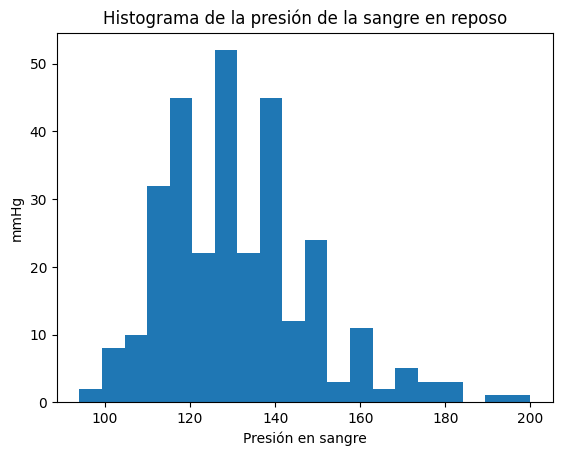

In [61]:
print_histogram(
    heart_dataset[resting_blood_pressure], 
    "Histograma de la presión de la sangre en reposo",
    "Presión en sangre",
    "mmHg")


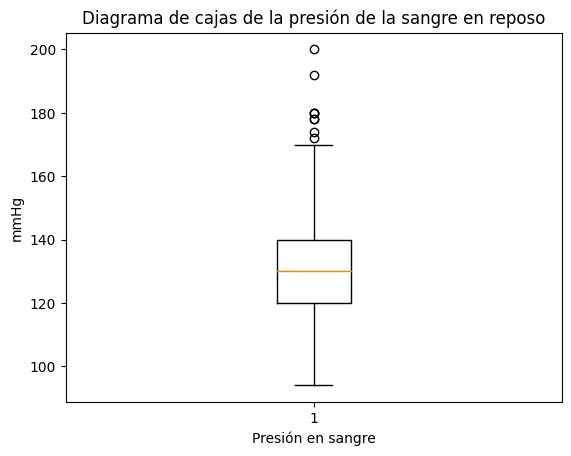

In [62]:
print_boxplot(
    heart_dataset[resting_blood_pressure], 
    "Diagrama de cajas de la presión de la sangre en reposo",
    "Presión en sangre",
    "mmHg")

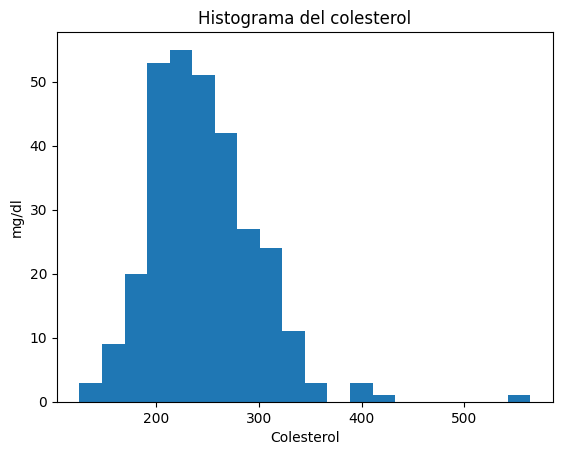

In [63]:
print_histogram(
    heart_dataset[cholestoral], 
    "Histograma del colesterol",
    "Colesterol",
    "mg/dl")

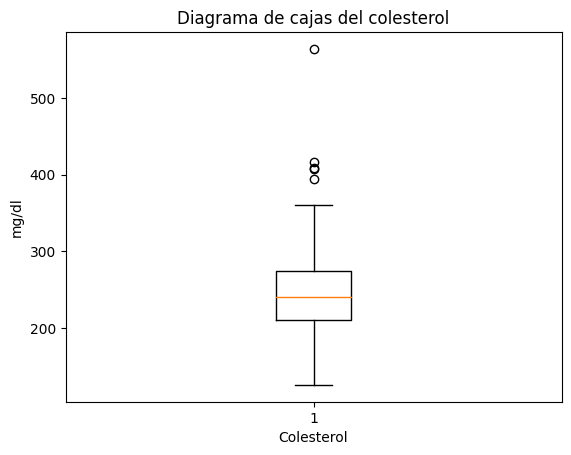

In [64]:
print_boxplot(
    heart_dataset[cholestoral], 
    "Diagrama de cajas del colesterol",
    "Colesterol",
    "mg/dl")

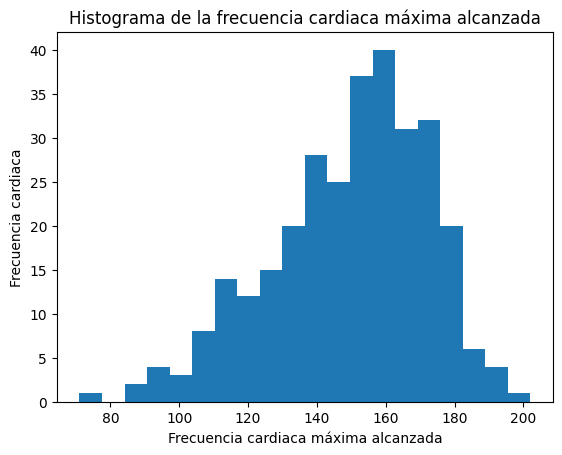

In [65]:
print_histogram(
    heart_dataset[maximum_heart_rate], 
    "Histograma de la frecuencia cardiaca máxima alcanzada",
    "Frecuencia cardiaca máxima alcanzada",
    "Frecuencia cardiaca")

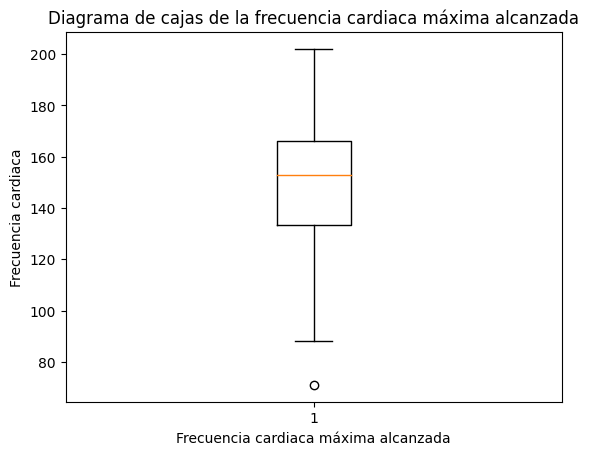

In [66]:
print_boxplot(
    heart_dataset[maximum_heart_rate], 
    "Diagrama de cajas de la frecuencia cardiaca máxima alcanzada",
    "Frecuencia cardiaca máxima alcanzada",
    "Frecuencia cardiaca")

Tras observar las gráficas, podemos concluir que mientras que la presión arterial en reposo y el colesterol tienen valores extremos por ser muy superiores a la media, la frecuencia máxima alcanzada es al revés, se trata de un valor muy por debajo de la media, lo que se puede intuir que este valor sí se puede tratar de un error, lo cual es más difícil afirmar en el resto de valores extremos.

### 4.2. Comparación de la normalidad y homogeneidad de la varianza



Para la comparación de normalidad y homogeneidad de la varianza de las variables, vamos a utilizar la prueba de de normalidad de Shapiro-Wilk a las variables que vamos a emplear. Para ello definimos la siguiente función en Python.

In [68]:
def shapiro_test(data_set, column_name):
    statistic, p_value = shapiro(data_set[column_name])  
    print("Prueba de normalidad de Shapiro-Wilk en la columna ", column_name, " :")  
    print("Estadístico de prueba:", statistic)  
    print("Valor p:", p_value)  

Una vez definida, ejecutamos el test para cada variable:

In [71]:
shapiro_test(
    heart_dataset,
    cholestoral)

Prueba de normalidad de Shapiro-Wilk en la columna  chol  :
Estadístico de prueba: 0.9468811750411987
Valor p: 5.364368060867264e-09


In [75]:
shapiro_test(
    heart_dataset,
    resting_blood_pressure)

Prueba de normalidad de Shapiro-Wilk en la columna  trtbps  :
Estadístico de prueba: 0.9659166932106018
Valor p: 1.4575286968465662e-06


In [76]:
shapiro_test(
    heart_dataset,
    fasting_blood_sugar)

Prueba de normalidad de Shapiro-Wilk en la columna  fbs  :
Estadístico de prueba: 0.4239869713783264
Valor p: 5.4308542423809215e-30


In [77]:
shapiro_test(
    heart_dataset,
    resting_electrocardiographic_results)

Prueba de normalidad de Shapiro-Wilk en la columna  restecg  :
Estadístico de prueba: 0.6793190240859985
Valor p: 1.3784006410641926e-23


In [78]:
shapiro_test(
    heart_dataset,
    maximum_heart_rate)

Prueba de normalidad de Shapiro-Wilk en la columna  thalachh  :
Estadístico de prueba: 0.9763153195381165
Valor p: 6.620732165174559e-05


Viendo los resultados, se puede concluir que como todos los p valores son muy inferiores al nivel de significancia (0,05), estos no siguen una distribución normal.

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos

Como los diferentes datos del dataset no presentan una distribución normal, las pruebas estadísticas que se utilizarán para analizar y comparar los diferentes grupos serán paramétricas. Para las variables dicotómicas, utilizaremos el test de Wilcoxon. 

In [82]:
def wilcoxon_test(data_set, column_name_first, column_name_second):
    statistic, p_value = wilcoxon(data_set[column_name_first], data_set[column_name_second])  
    print("Prueba de Wilcoxon en las columnas ", column_name_first, " y ", column_name_second)  
    print("Estadístico de prueba:", statistic)  
    print("Valor p:", p_value)  

Comparamos la glucemia en ayunas mayor a 120 mg/dl con la probabilidad de infarto.

In [86]:
wilcoxon_test(
    heart_dataset,
    fasting_blood_sugar,
    chance_heart_attack)

Prueba de Wilcoxon en las columnas  fbs  y  output
Estadístico de prueba: 1815.0
Valor p: 7.224055883238502e-21


En el test anterior se muestra que las diferencias entre los grupos de datos son estadísticamente significativas (p < 0.05). Es decir, la glucemia es estadísticamente diferentes entre personas con más probabilidad de infartos que con las de menos probabilidad.

El test equivalente cuando se tienen 3 o más grupos de datos, como es el caso del tipo de dolor torácico y el de resultados electrocardiográficos, es el test de Kruskal-Wallis:

In [89]:
def krushal_test(data_set, column_name_first, column_name_second):
    statistic, p_value = kruskal(data_set[column_name_first], data_set[column_name_second])  
    print("Prueba de Kruskal-Wallis en las columnas ", column_name_first, " y ", column_name_second)  
    print("Estadístico de prueba:", statistic)  
    print("Valor p:", p_value)  

Comparamos el tipo de dolor torácico con la probabilidad de sufrir un infarto.

In [91]:
krushal_test(
    heart_dataset,
    chest_pain,
    chance_heart_attack)

Prueba de Kruskal-Wallis en las columnas  cp  y  output
Estadístico de prueba: 17.47159524838154
Valor p: 2.9163252122459847e-05


Comparamos el tipo de resultado de electrocardiograma en reposo con la probabilidad de sufrir un infarto.

In [92]:
krushal_test(
    heart_dataset,
    resting_electrocardiographic_results,
    chance_heart_attack)

Prueba de Kruskal-Wallis en las columnas  restecg  y  output
Estadístico de prueba: 0.3055092250978719
Valor p: 0.5804490681583108


En este caso, observamos que el dolor torácico sí tiene una cierta diferencia estadística entre grupos por probabilidad de infarto, pero no podemos asegurar lo mismo para el tipo e electrocardiagrama en reposo ya que para este caso sí hay un p value significativo al ser mayor que 0,05.

A continuación, para las variables numéricas, vamos a estudiar sus correlaciones utilizando la correlación de Spearman ya que no podemos confirmar la normalidad y homocedasticidad.

In [96]:
def student_test(data_set, column_name, column_name_target):
    group1 = data_set[column_name][data_set[column_name_target] == 0]
    group2 = data_set[column_name][data_set[column_name_target] == 1]
    statistic, p_value = ttest_ind(group1, group2)  
    print("Test de student en las columnas ", column_name, " y ", column_name_target)  
    print("Estadístico de prueba:", statistic)  
    print("Valor p:", p_value)  

Comparamos el tipo de resultado del colesterol con la probabilidad de sufrir un infarto.

In [97]:
student_test(
    heart_dataset,
    cholestoral,
    chance_heart_attack
)

Test de student en las columnas  chol  y  output
Estadístico de prueba: 1.4842450762526977
Valor p: 0.1387903269560064


Se observa que tiene un p significativo (p > 0.05) y por lo tanto se puede concluir que no hay una diferencia significativa entre las medias de los dos grupos.

Ahora comparamos con la frecuencia máxima alcanzada.

In [98]:
student_test(
    heart_dataset,
    maximum_heart_rate,
    chance_heart_attack
)

Test de student en las columnas  thalachh  y  output
Estadístico de prueba: -8.069702869452568
Valor p: 1.697337638656049e-14


Se observa que tiene un p no significativo (p < 0.05) y por lo que se puede concluir que hay una diferencia significativa entre las medias de los dos grupos y que por lo tanto sí es un factor a tener en cuenta para un infarto.

Por último comparamos con la presión arterial en reposo:

In [99]:
student_test(
    heart_dataset,
    resting_blood_pressure,
    chance_heart_attack
)

Test de student en las columnas  trtbps  y  output
Estadístico de prueba: 2.5412927171039
Valor p: 0.011546059200233312


Y se observa que tiene, al igual que el nivel de colesterol, un p significativo (p > 0.05) y por lo que se puede concluir que no hay una diferencia significativa entre las medias de los dos grupos y que por lo tanto no se intuye correlación.

## 6. Resolución del problema


A partir del análisis anterior, hemos podido profundizar en qué variables médicas se tiene una mayor correlación con probabilidad de infarto. Con esta información se puede intuir en un paciente las probabilidades de que sufra un infarto. Se observan que variables como la frecuencia cardiaca máxima alcanzada, el tipo de dolor torácico y la glucemia en ayunas mayor a 120 mg/dl pueden ser indicadores interesantes al tener una cierta correlación. Por otro lado el resto de variables no encuentran diferencias estadísticas.

Por lo tanto, podemos concluir que de las variables analizadas, hay 3 que permiten darnos indicadores médicos que puedan aproximar en cierta medida la probabilidad de infarto.